In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

#libraries to conect to centralised pool of info
import yfinance as yf
import datetime as dt

#library to send email using outlook
import win32com.client as win32

plt.style.use ('ggplot')

pd.options.display.float_format = '{:,.4f}'.format

## Input files upload and parameter definition

In [4]:
#Saving current working directory
path = os.path.join(os.getcwd(), )
#Importing list of pms to track
file_name = 'aa_eq_class.xlsx'
aa = pd.read_excel(path+'/input/' + file_name)
#Creating a list of tickers to download from yahoo finance
tkrs = list(aa.yahoo_f)
#List of asset allocation buckets. Used for performance attribution purposes
aa_buckets = pd.unique(aa['classification'])

In [5]:
SRC_DATA_FILENAME='prices_asset_allocation.pkl'
try: 
    df_px = pd.read_pickle(path+'/input/' +SRC_DATA_FILENAME)
    last_date = df_px.index[-1]
    st_last_date = last_date.strftime('%Y-%m-%d')
    print('Potentially new data available')
except FileNotFoundError:
    st_last_date = '2019-08-31'
    print('Read from yf')


Potentially new data available


In [6]:
#Downloading pricing information for each asset
yf_prices = yf.download(tkrs, start= st_last_date,period = 'max')

[*********************100%***********************]  23 of 23 completed


In [7]:
yf_prices['Adj Close']

Ticker,AAXJ,DBB,DBE,EMB,EMLC,EWJ,EWU,EZU,HYG,IAU,...,LQD,SHV,SHY,SHYG,SLQD,SLV,STIP,TIP,TLH,VNQ
Date,,,,,,,,,,,,,,,,,,,,,
2024-12-03 00:00:00+00:00,74.7200,20.2500,19.1400,91.6800,23.6700,71.5500,35.8800,48.1500,79.6500,49.8900,...,109.9500,110.1400,82.0600,43.0100,49.9100,28.2800,100.9400,108.5600,104.2100,96.2400


In [8]:
yf_prices['Adj Close'].isna().sum().sum()

0

In [9]:
df_px['Adj Close'].tail()

Ticker,AAXJ,DBB,DBE,EMB,EMLC,EWJ,EWU,EZU,HYG,IAU,...,LQD,SHV,SHY,SHYG,SLQD,SLV,STIP,TIP,TLH,VNQ
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-26 00:00:00+00:00,73.6300,20.1300,19.1300,91.5700,23.7500,68.0700,35.1800,47.0400,79.6400,49.6900,...,109.4700,110.4400,82.1700,43.0900,49.9000,27.8000,100.8800,108.1100,103.6800,97.9700
2024-11-27 00:00:00+00:00,74.0100,20.2200,18.9600,91.8900,23.8400,67.8800,35.5700,47.3000,79.8800,49.7800,...,109.8700,110.4600,82.2200,43.2000,49.9700,27.4500,100.9700,108.4500,104.3300,98.6000
2024-11-29 00:00:00+00:00,74.2000,20.1400,18.9900,92.1500,23.9000,69.6900,35.8000,47.8600,80.0400,50.2500,...,110.5500,110.5100,82.3200,43.3000,50.0500,27.9200,101.0800,108.7600,105.0400,98.1600
2024-12-02 00:00:00+00:00,74.5100,20.1900,18.8300,91.6600,23.6800,70.5400,35.7400,47.9100,79.6500,49.7900,...,110.3400,110.1100,82.0500,43.0100,49.9000,27.7900,100.8500,108.5100,104.9100,96.7300
2024-12-03 00:00:00+00:00,74.6550,20.2700,19.1900,91.7850,23.6967,71.5600,35.9650,48.2719,79.7150,49.9750,...,110.2300,110.1350,82.1010,43.0600,49.9300,28.2650,100.9650,108.6900,104.6700,96.6100


In [10]:
df_px = pd.concat([df_px,yf_prices],axis=0)
df_px = df_px[~df_px.index.duplicated(keep='last')]
df_px.dropna(inplace=True)
df_px.to_pickle(path+'/input/' +SRC_DATA_FILENAME)

In [11]:
df_px['Adj Close'].to_csv('prices.csv')

In [12]:
df_px['Adj Close'].tail()

Ticker,AAXJ,DBB,DBE,EMB,EMLC,EWJ,EWU,EZU,HYG,IAU,...,LQD,SHV,SHY,SHYG,SLQD,SLV,STIP,TIP,TLH,VNQ
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-26 00:00:00+00:00,73.6300,20.1300,19.1300,91.5700,23.7500,68.0700,35.1800,47.0400,79.6400,49.6900,...,109.4700,110.4400,82.1700,43.0900,49.9000,27.8000,100.8800,108.1100,103.6800,97.9700
2024-11-27 00:00:00+00:00,74.0100,20.2200,18.9600,91.8900,23.8400,67.8800,35.5700,47.3000,79.8800,49.7800,...,109.8700,110.4600,82.2200,43.2000,49.9700,27.4500,100.9700,108.4500,104.3300,98.6000
2024-11-29 00:00:00+00:00,74.2000,20.1400,18.9900,92.1500,23.9000,69.6900,35.8000,47.8600,80.0400,50.2500,...,110.5500,110.5100,82.3200,43.3000,50.0500,27.9200,101.0800,108.7600,105.0400,98.1600
2024-12-02 00:00:00+00:00,74.5100,20.1900,18.8300,91.6600,23.6800,70.5400,35.7400,47.9100,79.6500,49.7900,...,110.3400,110.1100,82.0500,43.0100,49.9000,27.7900,100.8500,108.5100,104.9100,96.7300
2024-12-03 00:00:00+00:00,74.7200,20.2500,19.1400,91.6800,23.6700,71.5500,35.8800,48.1500,79.6500,49.8900,...,109.9500,110.1400,82.0600,43.0100,49.9100,28.2800,100.9400,108.5600,104.2100,96.2400


In [13]:
#Calculate return from adjusted close price series
ret = df_px['Adj Close'].pct_change().fillna(0).copy()
#Remove timezone from datetime index 
ret.index = ret.index.tz_convert(None)# = ret.index.dt.tz_localize(None)
ret.to_excel(path+'/input/pms/quant_metrics/ret.xlsx')
#Remove timezone form datetime index and save excel file
df_px.index = df_px.index.tz_convert(None)# = ret.index.dt.tz_localize(None)
df_px.to_excel(path+'/input/pms/quant_metrics/px.xlsx')

In [14]:
ret.tail()

Ticker,AAXJ,DBB,DBE,EMB,EMLC,EWJ,EWU,EZU,HYG,IAU,...,LQD,SHV,SHY,SHYG,SLQD,SLV,STIP,TIP,TLH,VNQ
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-26,-0.0065,-0.0020,-0.0026,-0.0014,-0.0042,-0.0051,-0.0045,-0.0072,-0.0019,0.0020,...,-0.0026,0.0001,0.0000,-0.0023,-0.0008,0.0062,-0.0002,-0.0023,-0.0030,0.0040
2024-11-27,0.0052,0.0045,-0.0089,0.0035,0.0038,-0.0028,0.0111,0.0055,0.0030,0.0018,...,0.0037,0.0002,0.0006,0.0026,0.0014,-0.0126,0.0009,0.0031,0.0063,0.0064
2024-11-29,0.0026,-0.0040,0.0016,0.0028,0.0025,0.0267,0.0065,0.0118,0.0020,0.0094,...,0.0062,0.0005,0.0012,0.0023,0.0016,0.0171,0.0011,0.0029,0.0068,-0.0045
2024-12-02,0.0042,0.0025,-0.0084,-0.0053,-0.0092,0.0122,-0.0017,0.0010,-0.0049,-0.0092,...,-0.0019,-0.0036,-0.0033,-0.0067,-0.0030,-0.0047,-0.0023,-0.0023,-0.0012,-0.0146
2024-12-03,0.0028,0.0030,0.0165,0.0002,-0.0004,0.0143,0.0039,0.0050,0.0000,0.0020,...,-0.0035,0.0003,0.0001,0.0000,0.0002,0.0176,0.0009,0.0005,-0.0067,-0.0051


## Risk metric calculations

In [16]:
# Calculating the covariance matrix
covar_matrix_5y = ret.iloc[-252*5:].cov()*21
# Saving the information in local directory
covar_matrix_5y.to_excel(path+'/input/pms/quant_metrics/var_covar.xlsx')

In [17]:
#Downloading pricing information for market
acwi_prices = yf.download('ACWI', start= '2018-12-31',period = 'max')

[*********************100%***********************]  1 of 1 completed


In [18]:
# ACWI return series
acwi_ret = acwi_prices['Adj Close'].pct_change().fillna(0)

In [19]:
# Calculating acwi beta of assets
beta = {}

for x in ret.columns:
    cov_mkt_y = acwi_ret.iloc[-252*5:].cov(ret[x].iloc[-252*5:])
    var_mkt = acwi_ret.var()
    b = cov_mkt_y/var_mkt
    beta[x] = b
# Converting dict to dataframe    
beta = pd.DataFrame.from_dict(beta,orient='index',columns=['beta_acwi'])
# Saving beta as excel file
beta.to_excel(path+'/input/pms/quant_metrics/beta_acwi.xlsx')

## Close vs Adjusted close

In [21]:
r_c = df_px['Close'].pct_change().fillna(0).copy()
r_ac = df_px['Adj Close'].pct_change().fillna(0).copy()

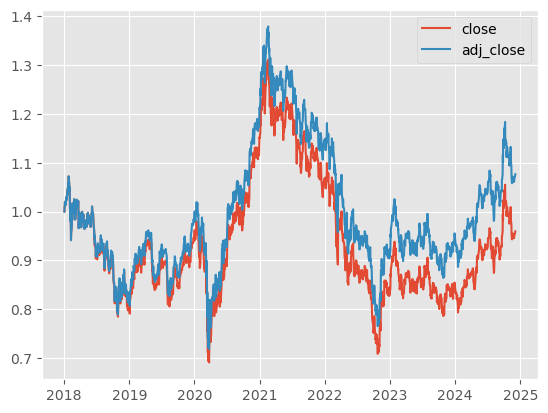

In [22]:
plt.plot(np.cumprod(1+r_c.iloc[:,0]),label= 'close')
plt.plot(np.cumprod(1+r_ac.iloc[:,0]),label= 'adj_close')
plt.legend()

## Importing PMs strategies

In [24]:
#Importing pms strategy
file_list = glob.glob(path+'/input/pms'+ "/*.xlsm")

In [25]:
# list of excel files we want to merge.
# pd.read_excel(file_path) reads the 
# excel data into pandas dataframe.

excl_list = []
 
for file in file_list:
    #print(file)
    excl_list.append(pd.read_excel(file,sheet_name='hist_db',header=0))

In [26]:
# concatenate all DataFrames in the list
# into a single DataFrame, returns new
# DataFrame.
df_strategy = pd.concat(excl_list, ignore_index=True)
 
# exports the dataframe into excel file
# with specified name.
df_strategy.to_excel(path +'/input/pms/' +'hist_pms_db.xlsx', index=False)

C:\Users\user\AppData\Local\Temp\ipykernel_17008\4241124666.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_strategy = pd.concat(excl_list, ignore_index=True)


In [27]:
df_strategy.ticker = df_strategy.ticker.map(dict(aa[['ticker','yahoo_f']].values)).str.upper()

In [28]:
#Create a time series table with historical gaps
df = pd.pivot_table(df_strategy, values = ['gap(bps)'], index = ['date','manager'], columns=['ticker']).fillna(0)
df.tail()

gap(bps)                                                   \
ticker                 AAXJ       DBB      DBE       EMB      EMLC       EWJ   
date       manager                                                             
2024-12-02 lj_pm     0.0000    0.0000   0.0000    0.0000    0.0000    0.0000   
           mpr_pm  -75.0000  -75.0000 -50.0000 -100.0000    0.0000   50.0000   
           ns_pm     0.0000    0.0000   0.0000    0.0000    0.0000  200.0000   
           pn_pm     0.0000 -200.0000   0.0000    0.0000 -100.0000    0.0000   
2024-12-04 wb_pm   100.0000    0.0000   0.0000  100.0000 -100.0000 -100.0000   

                                                           ...            \
ticker                   EWU       EZU       HYG      IAU  ...       LQD   
date       manager                                         ...             
2024-12-02 lj_pm      0.0000    0.0000 -150.0000 100.0000  ... -100.0000   
           mpr_pm     0.0000  -50.0000  -50.0000   0.0000  ...  -50.0000   
           ns_pm      0.0000    0.0000    0.0000   0.0000  ...    0.0000   
           pn_pm   -125.0000 -125.0000    0.0000   0.0000  ...    0.0000   
2024-12-04 wb_pm      0.0000    0.0000    0.0000   0.0000  ...  100.0000   

                                                                          \
ticker                   SHV      SHY    SHYG      SLQD    SLV      STIP   
date       manager                                                         
2024-12-02 lj_pm      0.0000 100.0000  0.0000    0.0000 0.0000    0.0000   
           mpr_pm   150.0000  50.0000 75.0000   75.0000 0.0000   50.0000   
           ns_pm   -400.0000   0.0000  0.0000    0.0000 0.0000    0.0000   
           pn_pm      0.0000 350.0000  0.0000    0.0000 0.0000    0.0000   
2024-12-04 wb_pm      0.0000 100.0000  0.0000 -100.0000 0.0000 -100.0000   

                                                 
ticker                   TIP       TLH      VNQ  
date       manager                               
2024-12-02 lj_pm      0.0000 -150.0000   0.0000  
           mpr_pm     0.0000 -100.0000   0.0000  
           ns_pm      0.0000    0.0000   0.0000  
           pn_pm      0.0000 -175.0000 200.0000  
2024-12-04 wb_pm   -100.0000  100.0000   0.0000  

[5 rows x 23 columns]

## Adjusting Tracking Error Ex Ante

In [30]:
# Loop to go over each trade date to adjust T.E. target  
for x in df.index:
    # Getting each trade date in index 
    p_wgt = df.loc[x]
    #print(x)
    # Calculate covar matrix
    s_dt = x[0].strftime('%Y-%m-%d')
    covar_mtx = ret.loc[:s_dt].iloc[-252*5:].cov()*21
    # Calculate portfolio T.E. ex ante 
    port_var = np.sqrt(np.dot(p_wgt.T, np.dot(covar_mtx, p_wgt)))
    # Calculate multiplier to get to target T.E. 
    mult = 30/port_var
    # Adjustment
    df.loc[x] = df.loc[x]*mult

C:\Users\user\AppData\Local\Temp\ipykernel_17008\3468854048.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  mult = 30/port_var


In [31]:
df.tail()

gap(bps)                                          \
ticker                  AAXJ       DBB       DBE       EMB      EMLC   
date       manager                                                     
2024-12-02 lj_pm      0.0000    0.0000    0.0000    0.0000    0.0000   
           mpr_pm  -173.3349 -173.3349 -115.5566 -231.1132    0.0000   
           ns_pm      0.0000    0.0000    0.0000    0.0000    0.0000   
           pn_pm      0.0000 -213.3197    0.0000    0.0000 -106.6598   
2024-12-04 wb_pm    298.1645    0.0000    0.0000  298.1645 -298.1645   

                                                                     ...  \
ticker                   EWJ       EWU       EZU       HYG      IAU  ...   
date       manager                                                   ...   
2024-12-02 lj_pm      0.0000    0.0000    0.0000 -345.7784 230.5189  ...   
           mpr_pm   115.5566    0.0000 -115.5566 -115.5566   0.0000  ...   
           ns_pm    276.9121    0.0000    0.0000    0.0000   0.0000  ...   
           pn_pm      0.0000 -133.3248 -133.3248    0.0000   0.0000  ...   
2024-12-04 wb_pm   -298.1645    0.0000    0.0000    0.0000   0.0000  ...   

                                                                           \
ticker                   LQD       SHV      SHY     SHYG      SLQD    SLV   
date       manager                                                          
2024-12-02 lj_pm   -230.5189    0.0000 230.5189   0.0000    0.0000 0.0000   
           mpr_pm  -115.5566  346.6698 115.5566 173.3349  173.3349 0.0000   
           ns_pm      0.0000 -553.8242   0.0000   0.0000    0.0000 0.0000   
           pn_pm      0.0000    0.0000 373.3094   0.0000    0.0000 0.0000   
2024-12-04 wb_pm    298.1645    0.0000 298.1645   0.0000 -298.1645 0.0000   

                                                           
ticker                  STIP       TIP       TLH      VNQ  
date       manager                                         
2024-12-02 lj_pm      0.0000    0.0000 -345.7784   0.0000  
           mpr_pm   115.5566    0.0000 -231.1132   0.0000  
           ns_pm      0.0000    0.0000    0.0000   0.0000  
           pn_pm      0.0000    0.0000 -186.6547 213.3197  
2024-12-04 wb_pm   -298.1645 -298.1645  298.1645   0.0000  

[5 rows x 23 columns]

In [32]:
managers = np.array(df.index.get_level_values(1).unique())

## PMs folder creation and management

In [34]:
# List of pms with folders
folders = glob.glob(path+'/input/pms/output'+ "/*")
# Getting the name of the folders 
fol = []
for folder in folders:
    f = os.path.basename(folder)
    fol.append(f)

In [35]:
missing_folders = list(set(managers).difference(fol))
missing_folders

[]

In [36]:
# Creating missing pm folder
for mf in missing_folders:
    os.mkdir(os.path.join(path +'\input\pms\output/' , mf))

<>:3: SyntaxWarning: invalid escape sequence '\i'
<>:3: SyntaxWarning: invalid escape sequence '\i'
C:\Users\user\AppData\Local\Temp\ipykernel_17008\2107820.py:3: SyntaxWarning: invalid escape sequence '\i'
  os.mkdir(os.path.join(path +'\input\pms\output/' , mf))


## Asset Allocation gaps 

In [38]:
#Changing column name using a dictionary of yahoo ticker to aa bucket classification i.e 'ivv': 'dm_eq'
buckets_strat = df.rename(columns=dict(zip(aa.yahoo_f.str.upper(),aa.classification)))
#buckets_strat = buckets_strat.groupby(axis=1,level=0).sum()
buckets_strat = buckets_strat.groupby(axis=1,level=1).sum()
buckets_strat.tail()

C:\Users\user\AppData\Local\Temp\ipykernel_17008\4159121544.py:4: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  buckets_strat = buckets_strat.groupby(axis=1,level=1).sum()


ticker                  CASH     COMMO   CRED_FI    DM_EQ     EM_EQ    REITS  \
date       manager                                                             
2024-12-02 lj_pm      0.0000  230.5189 -576.2974 461.0379    0.0000   0.0000   
           mpr_pm   346.6698 -288.8915 -115.5566 346.6698 -288.8915   0.0000   
           ns_pm   -553.8242    0.0000    0.0000 553.8242    0.0000   0.0000   
           pn_pm      0.0000 -213.3197 -106.6598 159.9898 -239.9846 213.3197   
2024-12-04 wb_pm      0.0000    0.0000    0.0000   0.0000    0.0000   0.0000   

ticker                SOV_FI  
date       manager            
2024-12-02 lj_pm   -115.2595  
           mpr_pm     0.0000  
           ns_pm      0.0000  
           pn_pm    186.6547  
2024-12-04 wb_pm      0.0000

In [39]:
#Changing column name using a dictionary of yahoo ticker to aa bucket classification i.e 'ivv': 'dm_eq'
buckets_ret = ret.rename(columns=dict(zip(aa.yahoo_f.str.upper(),aa.classification)))
buckets_ret = buckets_ret.groupby(axis=1,level=0).mean()
#Uppercasing column names to maintain formatting
buckets_ret.columns =buckets_ret.columns.str.upper() 

C:\Users\user\AppData\Local\Temp\ipykernel_17008\1102173024.py:3: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  buckets_ret = buckets_ret.groupby(axis=1,level=0).mean()


In [40]:
#Adding the bucket return to the returns dataframe
ret = ret.merge(buckets_ret,left_index=True, right_index=True)

In [41]:
#ret['bench'] = ret[tkrs].mean(axis=1)
ret.tail()

Ticker,AAXJ,DBB,DBE,EMB,EMLC,EWJ,EWU,EZU,HYG,IAU,...,TIP,TLH,VNQ,CASH,COMMO,CRED_FI,DM_EQ,EM_EQ,REITS,SOV_FI
Date,,,,,,,,,,,,,,,,,,,,,
2024-11-26,-0.0065,-0.0020,-0.0026,-0.0014,-0.0042,-0.0051,-0.0045,-0.0072,-0.0019,0.0020,...,-0.0023,-0.0030,0.0040,0.0001,0.0009,-0.0022,-0.0027,-0.0074,0.0040,-0.0012
2024-11-27,0.0052,0.0045,-0.0089,0.0035,0.0038,-0.0028,0.0111,0.0055,0.0030,0.0018,...,0.0031,0.0063,0.0064,0.0002,-0.0038,0.0030,0.0027,-0.0066,0.0064,0.0027
2024-11-29,0.0026,-0.0040,0.0016,0.0028,0.0025,0.0267,0.0065,0.0118,0.0020,0.0094,...,0.0029,0.0068,-0.0045,0.0005,0.0060,0.0029,0.0126,-0.0070,-0.0045,0.0029
2024-12-02,0.0042,0.0025,-0.0084,-0.0053,-0.0092,0.0122,-0.0017,0.0010,-0.0049,-0.0092,...,-0.0023,-0.0012,-0.0146,-0.0036,-0.0049,-0.0052,0.0036,-0.0014,-0.0146,-0.0024
2024-12-03,0.0028,0.0030,0.0165,0.0002,-0.0004,0.0143,0.0039,0.0050,0.0000,0.0020,...,0.0005,-0.0067,-0.0051,0.0003,0.0098,-0.0006,0.0059,0.0031,-0.0051,-0.0012


In [42]:
dt.datetime.today().strftime('%Y-%m-%d')

'2024-12-03'

## Functions Definition

In [44]:
def aa_decision(returns_usd, gaps_h, m):

    returns_usd = ret[aa_buckets].copy()
    #Loading infomration
    #wgt_mg_aa = gaps_h.iloc[gaps_h.index.get_level_values(1) == m].droplevel(1,axis=0).droplevel(0,axis=1).copy()/10_000
    wgt_mg_aa = gaps_h.iloc[gaps_h.index.get_level_values(1) == m].droplevel(1,axis=0)/10_000
    wgt_mg_aa.columns = wgt_mg_aa.columns.str.upper()
    #coerse timeseries with prices index
    mg_gaps_aa = pd.DataFrame(wgt_mg_aa,index=returns_usd.index).ffill()
    #calculate alpha by manager
    aa_perf = pd.DataFrame((returns_usd*mg_gaps_aa).apply(np.sum,axis=1),columns = ['asset_allocation'])
    #alpha_usd_aa[m] = mg_alpha_usd
    return wgt_mg_aa, aa_perf

In [45]:
def sel_decision(returns_usd, gaps_h, m):
    #Fullfil the 
    wgt_mg_sel = gaps_h.iloc[gaps_h.index.get_level_values(1) == m].droplevel(1,axis=0).droplevel(0,axis=1).copy()/10_000
    wgt_mg_sel.columns = wgt_mg_sel.columns.str.upper() 
    #coerse timeseries with prices index
    mg_gaps_sel = pd.DataFrame(wgt_mg_sel,index=returns_usd.index).ffill()
    #Selection performance calculation
    sel_performance = pd.DataFrame()
    for asset in wgt_mg_sel.columns:
        #print(asset)
        classification = aa.set_index(aa.yahoo_f).loc[asset].classification
        ret_class = ret[classification]
        diff_ret = (ret[asset]-ret_class)
        sel_performance[asset] = mg_gaps_sel[asset]*diff_ret
    #calculate selection alpha by manager
    sel_perf = pd.DataFrame(sel_performance.sum(axis=1),columns=['selection'])
    breakdown_sel_perf = pd.DataFrame(sel_performance)
    return wgt_mg_sel, sel_perf#, breakdwon_sel_perf


In [46]:
def graph_top_detr_contr(contribution_usd, m, save_path):
    top5 = contribution_usd.loc[:,m].sort_values(ascending =True).head(5).copy()
    bottom5 = contribution_usd.loc[:,m].sort_values(ascending =True).tail(5).copy()
    
    contr_df = pd.concat([top5,bottom5],axis=0)

    colors = ['#00BA38' if e >= 0 else 'red' for e in contr_df]
    plt.figure()
    plot = contr_df.plot(kind='barh',color=colors,figsize=(12,10))
    plt.xlabel('bps')
    plt.title(f'Top 5 contributor/detractors ITD | {m}')
    
    for container in plot.containers:
        plot.bar_label(container,color='grey',fmt='%.1f')

    plt.savefig(save_path +m+'/'+'top_contr_'+m+ '_ITD.png')
    plt.close()
    
    #return contr_df

In [47]:
def graph_cum_perf_10(start_date, alpha_series_usd, gross_net):

    latest = (alpha_series_usd-1).iloc[-1]
    #finding the top and bottom 5 pm names 
    top5 = list(latest.sort_values(ascending=False).head().index)
    bottom5 = list(latest.sort_values(ascending=False).tail().index)
    #linking and filtering dataframe to plot
    gf = top5+bottom5
    plot_df = ((alpha_series_usd[gf]-1)*10_000)
    #getting last date
    last_date = alpha_series_usd.index[-1].strftime('%Y-%m-%d')
    #creating enough unique colors 
    my_colors = sns.color_palette('hls',len(plot_df.columns))
    #
    plt.figure()
    plot_df.plot(color = my_colors, figsize=(12,10));
    #
    plt.suptitle('Cumulative excess return: '+ start_date + ' to '+last_date +' | Top & Bottom 5' ,fontsize=16)
    plt.title(f'{gross_net} USD',fontsize=14)
    plt.ylabel('bps')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol= 1);
    #
    plt.savefig(save_path + f'/{gross_net}_perf_'+start_date+'.png')
    plt.close()
    

In [48]:
def perf_att_graph(aa_performance, sel_performance, start_date, excess_ret_series, m):
    
    base_100_aa = (np.cumprod(1+aa_performance)-1)*10_000
    base_100_sel = (np.cumprod(1+sel_performance)-1)*10_000
    base_100_exret = ((excess_ret_series[m]-1)*10_000)

    base_100_per_att = pd.concat([base_100_aa,base_100_sel,base_100_exret],axis=1).fillna(0)
    base_100_per_att['trading_costs'] = base_100_per_att[m]-(base_100_per_att['asset_allocation']+base_100_per_att['selection'])

    f, ax1 = plt.subplots()
    base_100_per_att.loc[start_date:,['asset_allocation','selection','trading_costs']].plot(kind='bar',stacked=True,ax=ax1,width=0.9,alpha=0.8,figsize=(12,10))
    #ax2 = ax1.twinx()
    plt.plot(ax1.get_xticks(),base_100_per_att.loc[start_date:,m],'k--',label=f'{m}')
    ax1.set_xticklabels(base_100_per_att.loc[start_date:].index.date,rotation=90);
    #plt.text(base_100_per_att.index[-1], base_100_per_att.iloc[-1][m], f'{base_100_per_att.iloc[-1][m]}')
    plt.title(f'Performance Attribution | {m}: ' + str(round(base_100_per_att.iloc[-1][m],1)) + ' bps' ,loc='center');
    plt.savefig(save_path +m+'/'+'perf_attr_'+m+ '_ITD.png')
    plt.close()
    

    

In [49]:
def historical_gaps_graph(wgt_mg_sel,start_date,save_path, m):

    #generating enough unique colors
    colors = plt.cm.tab20c(np.linspace(0, 1, 26))
    #creating the plot
    f, ax1 = plt.subplots()
    plot = (wgt_mg_sel.loc[start_date:]*10_000).plot(kind='bar',stacked=True, ax=ax1,color=colors,figsize=(12,10))
    #(wgt_mg_sel.loc['2024-08-31':]*10_000).plot.area(ax=ax1,color=colors)
    plot.set_xticklabels(wgt_mg_sel.loc[start_date:].index.date,rotation=90);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol= 1);
    plt.title(f'Historical Strat Breakdown (Sel) | {m}',loc='center');
    plt.savefig(save_path +m+'/'+'hist_strat_sel_'+m+ '_ITD.png')
    plt.close()
    

In [50]:
def historical_aa_gap_graph(wgt_mg_aa,start_date,save_path, m):
    f, ax1 = plt.subplots()
    #(wgt_mg_aa.loc['2024-08-31':]*10_000).plot(kind='bar',stacked=True, ax=ax1)
    
    plot = (wgt_mg_aa.loc[start_date:]*10_000).plot(kind='bar',stacked=True,ax=ax1,figsize=(12,10))
    ax1.set_xticklabels(wgt_mg_aa.loc[start_date:].index.date,rotation=90);
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol= 1);
    plt.title(f'Historical Strat Breakdown (AA) | {m}',loc='center');
    
    for container in plot.containers:
        plot.bar_label(container,label_type='center',color='lightgrey',fmt='%.1f')

    plt.savefig(save_path +m+'/'+'hist_strat_aa_'+m+ '_ITD.png')
    plt.close()

In [51]:
def contr_per_bucket(contribution_usd, aa, returns_usd, m, save_path):
    
    assets = aa['classification'].unique()
    
    #
    contr_merged = pd.merge(contribution_usd.reset_index(),aa[['yahoo_f','classification','asset']],left_on='Ticker',right_on='yahoo_f')
    contr_merged = contr_merged.set_index(['classification','asset'])
    c_m = contr_merged.copy()
    contr_merged.drop('yahoo_f',inplace = True,axis=1)
    
    # Calculate number of rows programatically
    ncols = 4
    nrows = len(assets) // ncols + (len(assets) % ncols > 0)
    
    saa = {}
    
    for n, sa in enumerate(assets):
    
        # Calculate cumulative return for each asset in bucket
        ## Create a dictionary of asset classes and securities belonging to ac
        ren = dict(zip(c_m.loc[sa,'Ticker'],c_m.loc[sa].index))
        # Calculating cumulative return
        returns_usd.iloc[0] = 0
        ret_cumul = np.cumprod(1+returns_usd[c_m.loc[sa,'Ticker']])
        # Changing form ticket to aa classification
        ret_cumul.rename(columns=ren,inplace=True)
        # Getting the performance till last date in percentages 
        final_ret =(ret_cumul.iloc[-1]-1)*100
        final_ret = final_ret.to_frame()
        # list of secutities in bucket
        fi = final_ret.index.to_list()
        
        # Creating subplot objects  
        
        ax1 = plt.subplot(nrows, ncols, n+1)
        ax2 = ax1.twinx()
        
        # Getting the total contribution of each bucket 
        s = contr_merged.loc[sa,m]
        saa[sa] =s.sum()
        
        s.index.name = sa

        # Plotting contribution and total return
        plot = s.plot(kind='bar',ax=ax1, label='Contribution (bps) (LHS)',figsize=(28,18))
        p = ax2.scatter(fi,final_ret.values,zorder=2, label='Return (%) (RHS)',color='#000000')

        # Legend formating
        L=ax1.legend(loc='upper center',bbox_to_anchor=(0.3, 1.10),frameon=False)#, ncol=3, prop={'size': 14})
        K=ax2.legend(loc='upper center',bbox_to_anchor=(0.7, 1.10),frameon=False)#, ncol=3, prop={'size': 14})
        
        # Adding numbers at edge of the bar
        for container in plot.containers:
            plot.bar_label(container,label_type='edge',color='black',fmt='%.1f')
        
        # Add label to each Y axis
        ax1.set_ylabel('bps')
        ax2.set_ylabel('%')
        
        # Hide grid lines
        ax2.grid(False)
        # range
        
        ax1_range = ax1.get_ylim()[1] - ax1.get_ylim()[0]
        ax2_ylim = ax2.get_ylim()
        
        if ax1.get_ylim()[0] == 0:
            
            ax1_ylim_new = (ax2_ylim[0],ax1.get_ylim()[1])
            ax1.set_ylim( ax1_ylim_new );
            
            fct = (0 - ax1.get_ylim()[0])/ax1_range
            ax2_ylim_new = (ax2_ylim[0],(0 - ax2_ylim[0]) / fct + ax2_ylim[0])
            # set new limits
            ax2.set_ylim( ax2_ylim_new );
        
            
        else:
            fct = (0 - ax1.get_ylim()[0])/ax1_range
        
        #ax2_ylim = ax2.get_ylim()
        # calculate new values for the second axis
        ax2_ylim_new = (ax2_ylim[0],(0 - ax2_ylim[0]) / fct + ax2_ylim[0])
        # set new limits
        ax2.set_ylim( ax2_ylim_new );
        
        plot = plt.suptitle(f'Contribution per bucket | {m}',fontsize=18, y=0.95)
        plt.subplots_adjust(hspace=0.5,wspace=0.3)
        
    
    
    ax1 = plt.subplot(nrows, ncols, n+2)
    total = pd.DataFrame.from_dict(saa, orient='index',columns=['Total contribution'])
    plot = total.plot(kind='bar',ax=ax1, label='Contribution (bps) (LHS)',
                                                     figsize=(28,18), color='black')
    
    L=plot.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),frameon=False)
       
    for container in plot.containers:
        plot.bar_label(container,label_type='edge',color='black',fmt='%.1f')

    plt.savefig(save_path +m+'/'+'total_contr_per_bucket'+m+ '_ITD.png')
    plt.close()

In [52]:
def last_aa_strategy_graph(last_strat_aa, start_date, save_path):
    
    f, ax1 = plt.subplots()
    plot = (last_strat_aa*10_000).T.plot(kind='bar',stacked=True,ax=ax1,figsize=(12,10))
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol= 1);
    plt.title(f'Current Strat (AA) | pms',loc='center');
    
    for container in plot.containers:
        plot.bar_label(container,label_type='center',color='lightgrey',fmt='%.1f',fontsize=8)

    plt.savefig(save_path + '/consolidated_strat_pms_'+start_date+'.png')
    plt.close()

In [53]:
def performance_calculation(returns_usd: pd.DataFrame, gaps_h:pd.DataFrame, 
                            start_date, managers, save_path, buckets_strat, aa):
    
    #filter by start_date
    st_challenge = '2024-10-21'
    idx = returns_usd[st_challenge:].index
    returns_usd = returns_usd[start_date:].copy()
    
    #Create dataframe to consolidate information
    alpha_usd = pd.DataFrame(None,index=returns_usd.index)
    alpha_net_usd = pd.DataFrame(None,index=returns_usd.index) 
    contribution_usd = pd.DataFrame(None, index=returns_usd.columns)
    
    last_strat_aa = pd.DataFrame(None,index=buckets_strat.columns)
    
    #Writer object to save contribution by security by date
    writer_usd = pd.ExcelWriter(save_path +"/"+"security_contribution_mgr_usd_"+start_date+".xlsx", engine='xlsxwriter')
    #writer_pos = pd.ExcelWriter(save_path +"/"+"pos_mgr_usd_"+start_date+".xlsx", engine='xlsxwriter')
    #Loop by manager to calculate metrics for each one
    
    for m in managers:
        print(m)
        #cleaning dataframe to get manager gaps 
        wgt_mg = gaps_h.iloc[gaps_h.index.get_level_values(1) == m].droplevel(1,axis=0).droplevel(0,axis=1).copy()/10_000
        # if wgt_mg.index[-1] == start_date
        if wgt_mg.index[-1].strftime('%Y-%m-%d') <= st_dt:
            wgt_mg.loc[st_dt] = wgt_mg.loc[wgt_mg.index[-1]]
            #buckets_strat.loc[st_dt] = buckets_strat.loc[buckets_strat.index[-1]]
        
        #coerse timeseries with prices index
        mg_gaps = pd.DataFrame(wgt_mg,index=idx).ffill()
        mg_gaps.loc[start_date,:] = np.nan
        mg_gaps = mg_gaps.reindex(returns_usd.index)
        #calculate cost of trading
        mg_trades = wgt_mg.diff()
        mg_trades.fillna(0,inplace=True)
        #calculating changes * 5 bps
        #mg_trades = mg_trades.loc[start_date:]
        #mg_trades.to_excel(f'delta_{m}.xlsx')
        mg_trades[mg_trades != 0] = np.abs(mg_trades[mg_trades != 0]) * 0.0005
        #calculate alpha by manager
        mg_alpha_usd = (returns_usd*mg_gaps).apply(np.sum,axis=1)
        alpha_usd[m] = mg_alpha_usd
        
        #calculate net alpha by manager
        net_ret = (1+mg_alpha_usd)/(1+mg_trades.reindex(returns_usd.index).fillna(0).sum(axis=1))-1   
        alpha_net_usd[m] = net_ret
        
        #Performance attribution --- AA ---
        wg_mg_aa, aa_performance = aa_decision(returns_usd, buckets_strat, m)
        last_strat_aa[m] = wg_mg_aa.iloc[-1].T 
        
        #Performance attribution --- Selection ---
        wg_mg_sel, sel_performance = sel_decision(returns_usd, gaps_h, m)
        #calculate contribution up to date of asset class
        contribution_usd[m] = (returns_usd*mg_gaps).apply(np.sum,axis=0)*10_000
        
        #security contribution by manager
        sec_contr_usd = ((returns_usd*mg_gaps)*10_000).T
        
        #save to excel file
        sec_contr_usd.to_excel(writer_usd,sheet_name=m)
        #mg_trades.to_excel(writer_pos,sheet_name=m)
        
        #generating contribution graph
        graph_top_detr_contr(contribution_usd, m, save_path)
        
        #performance attribution graph
        alpha_net_series_usd = np.cumprod(1+alpha_net_usd)
        perf_att_graph(aa_performance, sel_performance, start_date, alpha_net_series_usd, m)
        #historical selection gaps graph
        #historical_gaps_graph(wg_mg_sel,start_date,save_path,m)
        #historical aa gaps graph
        #historical_aa_gap_graph(wg_mg_aa,start_date,save_path,m)
        #contribution per risk bucket graph 
        contr_per_bucket(contribution_usd, aa, returns_usd, m, save_path)
        
    
    writer_usd.close()
        
    #cumulative alpha calculations 
    alpha_series_usd = np.cumprod(1+alpha_usd)
    alpha_net_series_usd = np.cumprod(1+alpha_net_usd)
    #Generating gross and net graphs
    #gross
    graph_cum_perf_10(start_date, alpha_series_usd, 'gross')
    #net
    graph_cum_perf_10(start_date, alpha_net_series_usd, 'net')
    # Last consolidated strategy
    last_aa_strategy_graph(last_strat_aa, start_date, save_path)
    
    # Cost calculation
    cost =(alpha_net_series_usd-alpha_series_usd)
    #print('Cost (bps)','\n',cost.iloc[-1]*10_000)

    last_date = (alpha_net_series_usd-1).iloc[-1]
    
    #Summary table (bps)
    summ_table_usd = (alpha_net_series_usd-1)*10_000
    summ_table_usd.to_excel(save_path +"/"+'cumulative_alpha_'+start_date+'_usd.xlsx')

    #Performnance Metrics table
    print(len(summ_table_usd))
    metrics_table = pd.DataFrame(None,index=summ_table_usd.columns)
    metrics_table['Excess return (bps)'] = summ_table_usd.iloc[-1]
    metrics_table['Ann. excess return (bps)'] = ((1+summ_table_usd.iloc[-1]/10_000)**(252/(len(summ_table_usd)))-1)*10_000
    metrics_table['Ann. T.E. ex-post (bps)'] = summ_table_usd.iloc[1:].std()*np.sqrt(252)
    metrics_table['Information Ratio'] = metrics_table['Ann. excess return (bps)']/metrics_table['Ann. T.E. ex-post (bps)']
    metrics_table.T.to_excel(save_path +"/"+'metric_table_'+start_date+'.xlsx')
    
    
    #export contribution (bps) to date
    contribution_usd.to_excel(save_path +"/"+'cumulative_contribution'+'_usd.xlsx')

    #export costs (bps) to date
    cost.to_excel(save_path +"/"+'cumulative_costs'+'_usd.xlsx')
    
    return summ_table_usd, contribution_usd, alpha_series_usd, returns_usd, cost


## Run code

In [55]:
save_path = path +'\input\pms\output\\'
st_dt = '2024-11-29'
summ_table_usd, contribution_usd, exc_ret_series, returns_usd, cost_usd = performance_calculation(ret, df, st_dt,
                                                                              managers, save_path, buckets_strat,
                                                                                                 aa)

<>:1: SyntaxWarning: invalid escape sequence '\i'
<>:1: SyntaxWarning: invalid escape sequence '\i'
C:\Users\user\AppData\Local\Temp\ipykernel_17008\2541929880.py:1: SyntaxWarning: invalid escape sequence '\i'
  save_path = path +'\input\pms\output\\'


PaolaR_pm
ab_pm
ay_pm
caa_pm
cab_pm
cl_pm
csr_pm
dcg_pm
hy_pm
ih_pm
imh_pm
jccr_pm
kt_pm
lc_pm
mk_pm
mpr_pm
no_pm
pn_pm
rm_pm
yb_pm
zd_pm
Hysa_pm
do_pm
ts_pm
wb_pm
by_pm
lj_pm
aa_pm
arn_pm
bd_pm
bm_pm
jk_pm
ns_pm
3


<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [56]:
bench = returns_usd[tkrs].mean(axis=1)
bench.iloc[0] = 0
cum_bench = (np.cumprod(bench+1)-1)*10_000


In [57]:
metrics_table = pd.DataFrame(None,index=summ_table_usd.columns)

metrics_table['Net excess return (bps)'] = summ_table_usd.iloc[-1]
metrics_table['Ann. net excess return (bps)'] = ((1+summ_table_usd.iloc[-1]/10_000)**(252/(len(summ_table_usd)))-1)*10_000
metrics_table['Ann. T.E. ex-post (bps)'] = summ_table_usd.iloc[1:].std()*np.sqrt(252)
metrics_table['Information Ratio'] = metrics_table['Ann. net excess return (bps)']/metrics_table['Ann. T.E. ex-post (bps)']
metrics_table['Abs return (bps)'] = cum_bench.iloc[-1] + metrics_table['Net excess return (bps)']
metrics_table['Ann. abs return (bps)'] = ((1+metrics_table['Abs return (bps)']/10_000)**(252/(len(metrics_table['Abs return (bps)'])))-1)*10_000
metrics_table['Trading costs (bps)'] = cost_usd.iloc[-1]*10_000

metrics_table['Drawdown (bps)'] = (summ_table_usd - summ_table_usd.cummax()).min()
metrics_table['Ann. drawdown (bps)'] = ((1+metrics_table['Drawdown (bps)']/10_000)**(252/(len(summ_table_usd)))-1)*10_000

metrics_table
metrics_table.sort_values(by='Information Ratio',inplace=True,ascending=False)

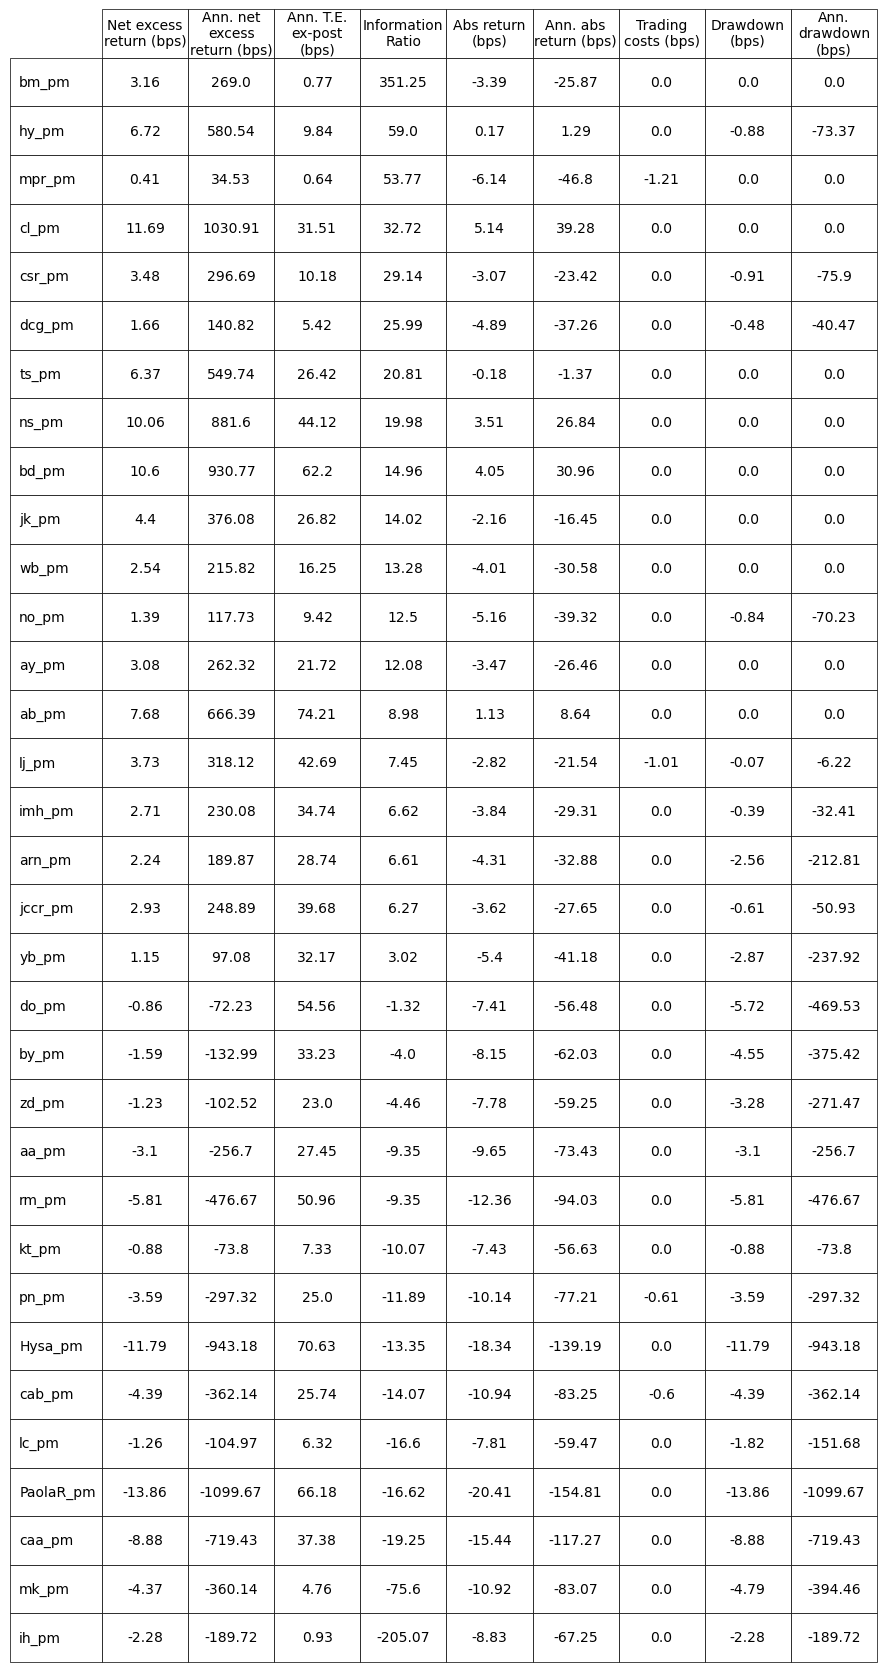

In [58]:
import textwrap as twp
#col name wrap
col_name = [twp.fill(i,12) for i in metrics_table.columns]
# Plotting figures
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')  # hide axes
ax.axis('tight')
tabla = plt.table(cellText=np.round(metrics_table.values,2), rowLabels=metrics_table.index, colLabels=col_name, loc='center',cellLoc='center')
tabla.auto_set_font_size(value=False)
tabla.set_fontsize(10)
tabla.scale(1,2)
fig.set_figheight(7)
fig.set_figwidth(10)
#plt.show()

plt.savefig(save_path+"/"+ f'metric_table_'+st_dt+'.png',bbox_inches='tight')

In [59]:
metrics_table

,Net excess return (bps),Ann. net excess return (bps),Ann. T.E. ex-post (bps),Information Ratio,Abs return (bps),Ann. abs return (bps),Trading costs (bps),Drawdown (bps),Ann. drawdown (bps)
bm_pm,3.1605,268.9962,0.7658,351.2540,-3.3913,-25.8681,0.0000,0.0000,0.0000
hy_pm,6.7203,580.5404,9.8404,58.9956,0.1685,1.2864,0.0000,-0.8767,-73.3715
mpr_pm,0.4104,34.5319,0.6422,53.7713,-6.1414,-46.8028,-1.2126,0.0000,0.0000
cl_pm,11.6873,"1,030.9114",31.5080,32.7190,5.1355,39.2836,0.0000,0.0000,0.0000
csr_pm,3.4812,296.6883,10.1807,29.1422,-3.0706,-23.4244,0.0000,-0.9070,-75.8993
dcg_pm,1.6649,140.8205,5.4186,25.9885,-4.8869,-37.2581,0.0000,-0.4827,-40.4678
ts_pm,6.3730,549.7400,26.4231,20.8053,-0.1788,-1.3655,0.0000,0.0000,0.0000
ns_pm,10.0631,881.5953,44.1197,19.9819,3.5113,26.8448,0.0000,0.0000,0.0000
bd_pm,10.6004,930.7658,62.2013,14.9638,4.0486,30.9580,0.0000,0.0000,0.0000
jk_pm,4.3960,376.0841,26.8157,14.0248,-2.1558,-16.4508,0.0000,0.0000,0.0000


### Old code for graphs

## Performance Atributtion

In this secction the code to calculate asset allocaton and selection decisions will be implemented.